# Project Scoping US Covid-19 Predictions 
### Project Author: Man Yi (Ariel) Yeung

### Project Objective:
The project's objective is to analyze past Covid-19 data in the US by county in order to predict on COVID-19 confirmed cases and death counts in the near future. 

### Motivation:
Speculations about future COVID-19 case counts would allow governments, businesses and individuals to prepare in advance and plan their responses accordingly. For instance, local governments can use the results to anticipate the need for emergency supplies and health-related public services, so as to devise solutions and contingency plans in advance. Hospitals can use the results to foresee medical supply and personnel shortages. Universities and companies can also use the results to plan for adequate protections as well as the frequency and size of in-person meetings based on the risk of transmission.


### Data Source:
The datasets used in this project are obtained from the "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University" at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series, where COVID-19 data by county are compiled from different state and local department of health websites

### Datasets:
- `time_series_covid19_confirmed_US.csv`: aggregated confirmed case counts in the US by county as of July 14, 2020
- `time_series_covid19_deaths_US.csv`: aggregated death case counts in the US by county as of July 14, 2020

### Table of Contents:
1. <a href='#1'>Data Processing</a>
2. <a href='#2'>Exploratory Data Analysis (EDA)</a>
3. <a href='#3'>Forecasting using Unsupervised Machine Learning Models</a>
4. <a href='#4'>Results and Discussion</a>
5. <a href='#5'>Conclusion</a>

### Required Python Modules:

In [3]:
import pandas as pd
import numpy as np
import re
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from datetime import datetime
import scipy.stats
import math

<a id='1'></a>

## Step 1: Data Preprocessing

In [4]:
# load data of Covid cases in USA by county
confirmed_data = pd.read_csv("./data/time_series_covid19_confirmed_US.csv")
death_data = pd.read_csv("./data/time_series_covid19_deaths_US.csv")

In [5]:
confirmed_data.head(8)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,613,619,622,626,629,633,628,616,614,620
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,490,494,501,503,510,510,511,513,515,517
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,901,912,930,931,934,946,967,968,979,983
5,84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,...,522,527,528,527,527,527,527,526,527,530
6,84001013,US,USA,840,1013.0,Butler,Alabama,US,31.753001,-86.680575,...,796,796,802,802,804,805,804,809,813,814
7,84001015,US,USA,840,1015.0,Calhoun,Alabama,US,33.774837,-85.826304,...,2028,2072,2105,2134,2144,2168,2179,2215,2225,2255


In [6]:
death_data.head(8)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,22,22,22,22,22,22,22,22,22,22
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,30,31,32,32,32,32,32,33,34,35
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7,7,7,7,7,7,7,7,7,7
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,5,6,6,6,6,6,6,5,5,5
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,5,5,6,6,6,6,6,7,7,9
5,84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,...,13,13,13,13,13,13,13,13,13,13
6,84001013,US,USA,840,1013.0,Butler,Alabama,US,31.753001,-86.680575,...,36,36,36,36,36,36,36,36,36,36
7,84001015,US,USA,840,1015.0,Calhoun,Alabama,US,33.774837,-85.826304,...,23,23,23,23,23,23,24,25,26,27


In [7]:
print("Dimensions:", confirmed_data.shape)
print(confirmed_data.columns.values)

Dimensions: (3340, 231)
['UID' 'iso2' 'iso3' 'code3' 'FIPS' 'Admin2' 'Province_State'
 'Country_Region' 'Lat' 'Long_' 'Combined_Key' '1/22/20' '1/23/20'
 '1/24/20' '1/25/20' '1/26/20' '1/27/20' '1/28/20' '1/29/20' '1/30/20'
 '1/31/20' '2/1/20' '2/2/20' '2/3/20' '2/4/20' '2/5/20' '2/6/20' '2/7/20'
 '2/8/20' '2/9/20' '2/10/20' '2/11/20' '2/12/20' '2/13/20' '2/14/20'
 '2/15/20' '2/16/20' '2/17/20' '2/18/20' '2/19/20' '2/20/20' '2/21/20'
 '2/22/20' '2/23/20' '2/24/20' '2/25/20' '2/26/20' '2/27/20' '2/28/20'
 '2/29/20' '3/1/20' '3/2/20' '3/3/20' '3/4/20' '3/5/20' '3/6/20' '3/7/20'
 '3/8/20' '3/9/20' '3/10/20' '3/11/20' '3/12/20' '3/13/20' '3/14/20'
 '3/15/20' '3/16/20' '3/17/20' '3/18/20' '3/19/20' '3/20/20' '3/21/20'
 '3/22/20' '3/23/20' '3/24/20' '3/25/20' '3/26/20' '3/27/20' '3/28/20'
 '3/29/20' '3/30/20' '3/31/20' '4/1/20' '4/2/20' '4/3/20' '4/4/20'
 '4/5/20' '4/6/20' '4/7/20' '4/8/20' '4/9/20' '4/10/20' '4/11/20'
 '4/12/20' '4/13/20' '4/14/20' '4/15/20' '4/16/20' '4/17/20' '4/18/20'
 '

In [8]:
print("Dimensions:", death_data.shape)
print(death_data.columns.values)

Dimensions: (3340, 232)
['UID' 'iso2' 'iso3' 'code3' 'FIPS' 'Admin2' 'Province_State'
 'Country_Region' 'Lat' 'Long_' 'Combined_Key' 'Population' '1/22/20'
 '1/23/20' '1/24/20' '1/25/20' '1/26/20' '1/27/20' '1/28/20' '1/29/20'
 '1/30/20' '1/31/20' '2/1/20' '2/2/20' '2/3/20' '2/4/20' '2/5/20' '2/6/20'
 '2/7/20' '2/8/20' '2/9/20' '2/10/20' '2/11/20' '2/12/20' '2/13/20'
 '2/14/20' '2/15/20' '2/16/20' '2/17/20' '2/18/20' '2/19/20' '2/20/20'
 '2/21/20' '2/22/20' '2/23/20' '2/24/20' '2/25/20' '2/26/20' '2/27/20'
 '2/28/20' '2/29/20' '3/1/20' '3/2/20' '3/3/20' '3/4/20' '3/5/20' '3/6/20'
 '3/7/20' '3/8/20' '3/9/20' '3/10/20' '3/11/20' '3/12/20' '3/13/20'
 '3/14/20' '3/15/20' '3/16/20' '3/17/20' '3/18/20' '3/19/20' '3/20/20'
 '3/21/20' '3/22/20' '3/23/20' '3/24/20' '3/25/20' '3/26/20' '3/27/20'
 '3/28/20' '3/29/20' '3/30/20' '3/31/20' '4/1/20' '4/2/20' '4/3/20'
 '4/4/20' '4/5/20' '4/6/20' '4/7/20' '4/8/20' '4/9/20' '4/10/20' '4/11/20'
 '4/12/20' '4/13/20' '4/14/20' '4/15/20' '4/16/20' '4/17/20'

The time series columns have different representation of year (mm/dd/yyyy vs mm/dd/yy). For consistency, the mm/dd/yyyy is used to represent dates in both datasets.

In [9]:
#change year in date columns to 4 digits
death_data.columns=np.array(list(map(lambda x: re.sub(r'/20$','/2020', x) ,death_data.columns.values)))
confirmed_data.columns=np.array(list(map(lambda x: re.sub(r'/20$','/2020', x) ,confirmed_data.columns.values)))
np.setdiff1d(death_data.columns.values, confirmed_data.columns.values)
death_data.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '8/19/2020', '8/20/2020', '8/21/2020', '8/22/2020', '8/23/2020',
       '8/24/2020', '8/25/2020', '8/26/2020', '8/27/2020', '8/28/2020'],
      dtype='object', length=232)

Dimensions of `confirmed_data` are (3340, 231).
Dimensions of `death_data` are (3340, 232).
The columns consist of two main parts: location description and time series.

#### Cleaning the data
Columns named `Admin2` are renamed to `County`, `Province_State` to `State`, and `Combined_Key` to `Location`.
The column `Country_Region` contains "US" for all rows, thus is deleted from the dataframe. 
The columns `UID`, `iso2`, `iso3`, `code3`, `FIPS`, `Lat`, and `Long_` are identifiers and descriptions of the different geographical locations. These data will have little use in the following exploratory data analysis (EDA). Thus, they will be removed in the cleaned version of the two datasets `cleaned_confirmed_data` and `cleaned_death_data`.

In [10]:
#rename columns
cleaned_confirmed_data = confirmed_data.rename({'Admin2': 'County', 'Combined_Key': 'Location', 'Province_State': 'State'}, axis='columns')
cleaned_death_data = death_data.rename({'Admin2': 'County', 'Combined_Key': 'Location', 'Province_State': 'State'}, axis='columns')

#remove column with same data for all
cleaned_confirmed_data.drop(['Country_Region'],axis=1, inplace=True)
cleaned_death_data.drop(['Country_Region'],axis=1, inplace=True)

#remove columns containing identifiers and descriptions of geographical locations
cleaned_confirmed_data.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Lat', 'Long_'],axis=1, inplace=True)
cleaned_death_data.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Lat', 'Long_'],axis=1, inplace=True)

cleaned_confirmed_data.head(8)

,County,State,Location,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,...,8/19/2020,8/20/2020,8/21/2020,8/22/2020,8/23/2020,8/24/2020,8/25/2020,8/26/2020,8/27/2020,8/28/2020
0,Autauga,Alabama,"Autauga, Alabama, US",0,0,0,0,0,0,0,...,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296
1,Baldwin,Alabama,"Baldwin, Alabama, US",0,0,0,0,0,0,0,...,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230
2,Barbour,Alabama,"Barbour, Alabama, US",0,0,0,0,0,0,0,...,613,619,622,626,629,633,628,616,614,620
3,Bibb,Alabama,"Bibb, Alabama, US",0,0,0,0,0,0,0,...,490,494,501,503,510,510,511,513,515,517
4,Blount,Alabama,"Blount, Alabama, US",0,0,0,0,0,0,0,...,901,912,930,931,934,946,967,968,979,983
5,Bullock,Alabama,"Bullock, Alabama, US",0,0,0,0,0,0,0,...,522,527,528,527,527,527,527,526,527,530
6,Butler,Alabama,"Butler, Alabama, US",0,0,0,0,0,0,0,...,796,796,802,802,804,805,804,809,813,814
7,Calhoun,Alabama,"Calhoun, Alabama, US",0,0,0,0,0,0,0,...,2028,2072,2105,2134,2144,2168,2179,2215,2225,2255


In [11]:
cleaned_death_data.head(8)

,County,State,Location,Population,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,8/19/2020,8/20/2020,8/21/2020,8/22/2020,8/23/2020,8/24/2020,8/25/2020,8/26/2020,8/27/2020,8/28/2020
0,Autauga,Alabama,"Autauga, Alabama, US",55869,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22
1,Baldwin,Alabama,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,...,30,31,32,32,32,32,32,33,34,35
2,Barbour,Alabama,"Barbour, Alabama, US",24686,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Bibb,Alabama,"Bibb, Alabama, US",22394,0,0,0,0,0,0,...,5,6,6,6,6,6,6,5,5,5
4,Blount,Alabama,"Blount, Alabama, US",57826,0,0,0,0,0,0,...,5,5,6,6,6,6,6,7,7,9
5,Bullock,Alabama,"Bullock, Alabama, US",10101,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
6,Butler,Alabama,"Butler, Alabama, US",19448,0,0,0,0,0,0,...,36,36,36,36,36,36,36,36,36,36
7,Calhoun,Alabama,"Calhoun, Alabama, US",113605,0,0,0,0,0,0,...,23,23,23,23,23,23,24,25,26,27


After resolving the difference in date representation, the difference between the columns in `cleaned_confirmed_data` and `cleaned_death_data` is that the latter has an extra `Population` column.

In [12]:
cleaned_confirmed_data[cleaned_confirmed_data["County"].isna()] 

,County,State,Location,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,...,8/19/2020,8/20/2020,8/21/2020,8/22/2020,8/23/2020,8/24/2020,8/25/2020,8/26/2020,8/27/2020,8/28/2020
100,NaN,American Samoa,"American Samoa, US",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336,NaN,Diamond Princess,"Diamond Princess, US",0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49
570,NaN,Grand Princess,"Grand Princess, US",0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
571,NaN,Guam,"Guam, US",0,0,0,0,0,0,0,...,599,704,767,767,767,907,984,1120,1232,1287
2121,NaN,Northern Mariana Islands,"Northern Mariana Islands, US",0,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54
3007,NaN,Virgin Islands,"Virgin Islands, US",0,0,0,0,0,0,0,...,828,869,932,960,980,984,998,1030,1052,1075


The locations represented in the two datasets also includes territories of the US, and two of the cruiseships that were heavily affected by the COVID-19 virus. For clearer classification, the name of the region or the cruise will be moved to the `County` column, and they will be categorized into "US territories" and "Cruiseships" in the `State` Columns.

In [13]:
#For US territories and cruiseships, move the value of state to county, assign "US territories" or "Cruiseships" in state column
mask = cleaned_confirmed_data["County"].isna()
cleaned_confirmed_data.loc[mask, 'County'] = cleaned_confirmed_data.loc[mask, 'State']
mask1=cleaned_confirmed_data["State"].isin(['Guam', 'American Samoa', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands'])
cleaned_confirmed_data.loc[mask1, 'State'] = '_US Territories'
mask2=cleaned_confirmed_data["State"].isin(['Diamond Princess', 'Grand Princess'])
cleaned_confirmed_data.loc[mask2, 'State'] = '_Cruiseships'

mask = cleaned_death_data["County"].isna()
cleaned_death_data.loc[mask, 'County'] = cleaned_death_data.loc[mask, 'State']
mask1=cleaned_death_data["State"].isin(['Guam', 'American Samoa', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands'])
cleaned_death_data.loc[mask1, 'State'] = '_US Territories'
mask2=cleaned_death_data["State"].isin(['Diamond Princess', 'Grand Princess'])
cleaned_death_data.loc[mask2, 'State'] = '_Cruiseships'

In [14]:
cleaned_confirmed_data.head()

,County,State,Location,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,...,8/19/2020,8/20/2020,8/21/2020,8/22/2020,8/23/2020,8/24/2020,8/25/2020,8/26/2020,8/27/2020,8/28/2020
0,Autauga,Alabama,"Autauga, Alabama, US",0,0,0,0,0,0,0,...,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296
1,Baldwin,Alabama,"Baldwin, Alabama, US",0,0,0,0,0,0,0,...,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230
2,Barbour,Alabama,"Barbour, Alabama, US",0,0,0,0,0,0,0,...,613,619,622,626,629,633,628,616,614,620
3,Bibb,Alabama,"Bibb, Alabama, US",0,0,0,0,0,0,0,...,490,494,501,503,510,510,511,513,515,517
4,Blount,Alabama,"Blount, Alabama, US",0,0,0,0,0,0,0,...,901,912,930,931,934,946,967,968,979,983


In [15]:
cleaned_death_data.head()

,County,State,Location,Population,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,8/19/2020,8/20/2020,8/21/2020,8/22/2020,8/23/2020,8/24/2020,8/25/2020,8/26/2020,8/27/2020,8/28/2020
0,Autauga,Alabama,"Autauga, Alabama, US",55869,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22
1,Baldwin,Alabama,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,...,30,31,32,32,32,32,32,33,34,35
2,Barbour,Alabama,"Barbour, Alabama, US",24686,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Bibb,Alabama,"Bibb, Alabama, US",22394,0,0,0,0,0,0,...,5,6,6,6,6,6,6,5,5,5
4,Blount,Alabama,"Blount, Alabama, US",57826,0,0,0,0,0,0,...,5,5,6,6,6,6,6,7,7,9


In [16]:
cleaned_confirmed_data.to_csv('./data/county_confirmed.csv')
cleaned_death_data.to_csv('./data/county_death.csv')

#### Group by State
Two new dataframes `state_confirmed` and `state_death` are created to provide COVID-19 information by state. This classification would enable clearer visualization and better comparison in the later Exploratory Data Analysis section.

In [17]:
#Group data by state, and obtain sum for each time series data

state_confirmed_data=cleaned_confirmed_data.drop(['County','Location'],1)
state_confirmed=state_confirmed_data.groupby('State').sum()

state_death_data=cleaned_death_data.drop(['County','Location'],1)
state_death=state_death_data.groupby('State').sum()

#Copy the population column to state_confirmed
state_confirmed.insert(0, 'Population', state_death['Population'])
state_confirmed.head()

,Population,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,8/19/2020,8/20/2020,8/21/2020,8/22/2020,8/23/2020,8/24/2020,8/25/2020,8/26/2020,8/27/2020,8/28/2020
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4903185,0,0,0,0,0,0,0,0,0,...,111478,112449,113632,114532,115060,116710,117242,119254,121023,122185
Alaska,731545,0,0,0,0,0,0,0,0,0,...,4438,4520,4588,4677,4741,4810,4843,4895,4974,5092
Arizona,7278717,0,0,0,0,1,1,1,1,1,...,195557,196280,196899,197895,198103,198414,199273,199459,200139,200658
Arkansas,3017804,0,0,0,0,0,0,0,0,0,...,54216,54765,55652,56199,56574,56894,57374,58023,58745,59583
California,39512223,0,0,0,0,2,2,2,2,2,...,647274,652267,658900,664435,669280,675561,681032,687004,691821,697385


<a id='2'></a>

## Step 2: Exploratory Data Analysis (EDA)

In this section, COVID-19 data is analyzed mainly through three visualization formats.
1. <a href='#2-1'>Aggregated Cases and Daily New Cases of COVID-19 Confirmed Counts and Death Counts in the US</a>
2. <a href='#2-2'>Monthly New Confirmed Counts and Death Counts for Each state in the US</a>
3. <a href='#2-3'>Top 10 US States with the Highest Aggregated Confirmed Counts and Death Counts</a>

<a id='2-1'></a>

### 1. Aggregated Cases and Daily New Cases of COVID-19 Confirmed Counts and Death Counts in the US


Two overall datasets `us_confirmed_npl` and `us_death_npl` are used to demonstrate the aggregated sum and daily new cases of COVID-19 counts in all states of the US. Two time series line graphs are plotting to show case both the aggregated cases and the daily new counts in the entire US regions.

In [18]:
# Create dataframe with state sum of aggregate case counts and dail new case counts
us_confirmed=pd.DataFrame(state_confirmed.sum(axis = 0, skipna = True))
us_confirmed.columns=['Aggregated']
us_confirmed_npl=us_confirmed.drop('Population', axis=0)
us_confirmed_npl['Daily New']=us_confirmed_npl['Aggregated'].diff(1)
us_confirmed_npl.fillna(0, inplace=True)

us_death=pd.DataFrame(state_death.sum(axis = 0, skipna = True))
us_death.columns=['Aggregated']
us_death_npl=us_death.drop('Population', axis=0)
us_death_npl['Daily New']=us_death_npl['Aggregated'].diff(1)
us_death_npl.fillna(0, inplace=True)
us_confirmed_npl.head()

,Aggregated,Daily New
1/22/2020,1,0.0
1/23/2020,1,0.0
1/24/2020,2,1.0
1/25/2020,2,0.0
1/26/2020,5,3.0


In [19]:
us_confirmed_npl.to_csv('./data/us_confirmed_npl.csv')
us_death_npl.to_csv('./data/us_death_npl.csv')

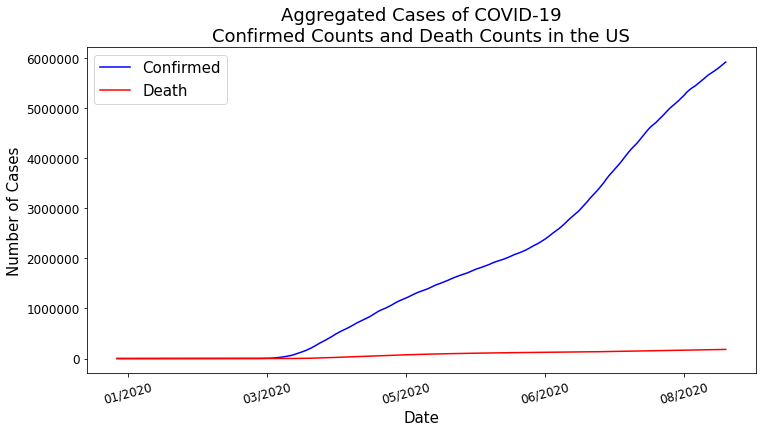

In [30]:
# Process time series index to fit line plot
date = [datetime.strptime(d, '%m/%d/%Y') for d in us_confirmed_npl.index] 
m_y = matplotlib.dates.date2num(date) 
formatter = matplotlib.dates.DateFormatter('%m/%Y') 

# set the figure dimensions
figure = plt.figure(figsize = (12, 6)) 
axes = figure.add_subplot(1, 1, 1) 
axes.xaxis.set_major_formatter(formatter) 

# Set the tick and label fontsize
plt.setp(axes.get_xticklabels(), rotation = 15) 
plt.tick_params(labelsize = 12)

axes.plot(m_y, us_confirmed_npl['Aggregated'],color='blue',label="Confirmed") 
axes.plot(m_y, us_death_npl['Aggregated'],color='red', label="Death") 

axes.get_yaxis().get_major_formatter().set_scientific(False)
# Set the title and axis labels
plt.title("Aggregated Cases of COVID-19\nConfirmed Counts and Death Counts in the US", fontsize = 18)
plt.ylabel("Number of Cases", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.legend(loc=2, prop={'size': 15})
plt.show() 

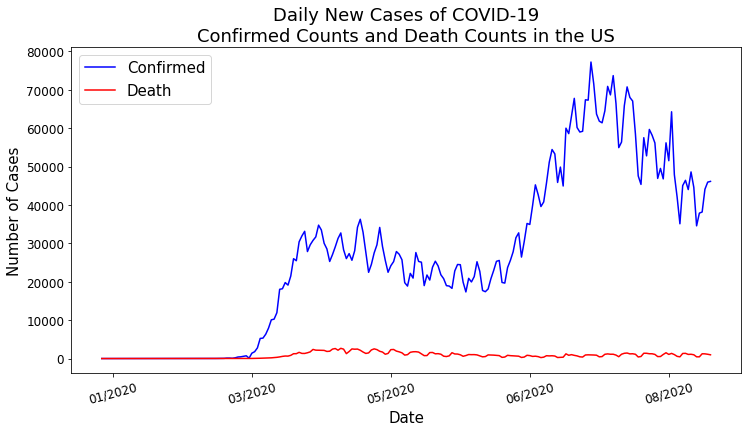

In [21]:
# set the figure dimensions
figure = plt.figure(figsize = (12, 6)) 
axes = figure.add_subplot(1, 1, 1) 
axes.xaxis.set_major_formatter(formatter) 

# Set the tick and label fontsize
plt.setp(axes.get_xticklabels(), rotation = 15) 
plt.tick_params(labelsize = 12)

axes.plot(m_y, us_confirmed_npl['Daily New'],color='blue',label="Confirmed") 
axes.plot(m_y, us_death_npl['Daily New'],color='red', label="Death") 


# Set the title and axis labels
plt.title("Daily New Cases of COVID-19\nConfirmed Counts and Death Counts in the US", fontsize = 18)
plt.ylabel("Number of Cases", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.legend(loc=2, prop={'size': 15})
plt.show() 

#### Pearson Correlation between US Confirmed Counts and US Death Counts for the Aggregated Sum and the Daily New Cases

In [22]:
conf_death_agg=scipy.stats.pearsonr(us_confirmed_npl['Aggregated'], us_death_npl['Aggregated'])[0]
conf_death_dn=scipy.stats.pearsonr(us_confirmed_npl['Daily New'], us_death_npl['Daily New'])[0]
Pearson_correlation=pd.DataFrame()
Pearson_correlation['US_Confirmed vs. US_Death']=[conf_death_agg, conf_death_dn]
Pearson_correlation.index=['Aggregated', 'Daily New']
Pearson_correlation

,US_Confirmed vs. US_Death
Aggregated,0.947346
Daily New,0.475812


Based on the two line graphs above, both the aggregated and daily new confirmed cases show a positive trend that has a particularly large rise starting in June. Compared to the confirmed counts, the aggregated death counts show a much slower rise, and the daily new death counts has smaller fluctuations starting from April. In addition, from the Pearson correlation, the aggregated US case counts for confirmed and death shows a more linear relationship than the daily new case counts.

<a id='2-2'></a>

### 2. Monthly New Confirmed Counts and Death Counts for Each state in the US by Month

The monthly new case counts for each US state is plotted in a time series boxplot to present the spread of monthly increases in different states for confirmed cases and death cases. Boxplots are provided with and without outliers to provide both a general picture and a zoomed in representation for better understanding of data spread.

Note: Data for July is incomplete. Only half of the month is taken into account. Updated data for the entire month of July, which will be available before the completion of the whole project, will provide a more reasonable and accurate presentation. 

Datasets `state_confirmed_mon_dn` and `state_death_mon_dn` are created to store monthly new case counts.

In [23]:
#Transpose table and get daily new values
state_confirmed_t=state_confirmed.drop('Population',1).transpose()
state_confirmed_t=state_confirmed_t.diff(1)
state_confirmed_t.fillna(0,inplace=True)
state_confirmed_mon_dn=state_confirmed_t

#Fix topleft most value
state_confirmed_mon_dn.insert(0, 'Date', state_confirmed_mon_dn.index)
state_confirmed_mon_dn.index=state_confirmed_mon_dn['Date']
state_confirmed_mon_dn.drop('Date',1,inplace=True)

#Group by month
state_confirmed_mon_dn.insert(0,'Month',[x.month for x in date])
temp=state_confirmed_mon_dn.copy()
state_confirmed_mon_dn=state_confirmed_mon_dn.groupby('Month').sum()

#Transpose table and get daily new values
state_death_t=state_death.drop('Population',1).transpose()
state_death_t=state_death_t.diff(1)
state_death_t.fillna(0,inplace=True)
state_death_mon_dn=state_death_t

#Fix topleft most value
state_death_mon_dn.insert(0, 'Date', state_death_mon_dn.index)
state_death_mon_dn.index=state_death_mon_dn['Date']
state_death_mon_dn.drop('Date',1,inplace=True)

#Group by month
state_death_mon_dn.insert(0,'Month',[x.month for x in date])
state_death_mon_dn=state_death_mon_dn.groupby('Month').sum()
state_death_mon_dn

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,_Cruiseships,_US Territories
Month,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,23.0,3.0,25.0,8.0,173.0,69.0,69.0,10.0,9.0,85.0,...,68.0,5.0,13.0,27.0,224.0,1.0,25.0,0.0,3.0,10.0
4,249.0,6.0,295.0,53.0,1858.0,708.0,2188.0,142.0,215.0,1183.0,...,821.0,41.0,36.0,525.0,589.0,40.0,291.0,7.0,0.0,93.0
5,358.0,1.0,587.0,72.0,2141.0,668.0,1687.0,214.0,242.0,1183.0,...,899.0,67.0,6.0,823.0,304.0,34.0,276.0,9.0,0.0,46.0
6,320.0,4.0,738.0,137.0,1910.0,245.0,378.0,143.0,85.0,1054.0,...,920.0,59.0,1.0,388.0,214.0,18.0,192.0,4.0,0.0,17.0
7,630.0,9.0,2049.0,183.0,3132.0,148.0,110.0,76.0,34.0,3338.0,...,4601.0,132.0,1.0,411.0,232.0,23.0,150.0,6.0,0.0,68.0
8,527.0,14.0,1284.0,303.0,3591.0,99.0,33.0,19.0,20.0,4114.0,...,5228.0,103.0,1.0,376.0,341.0,85.0,179.0,11.0,0.0,216.0


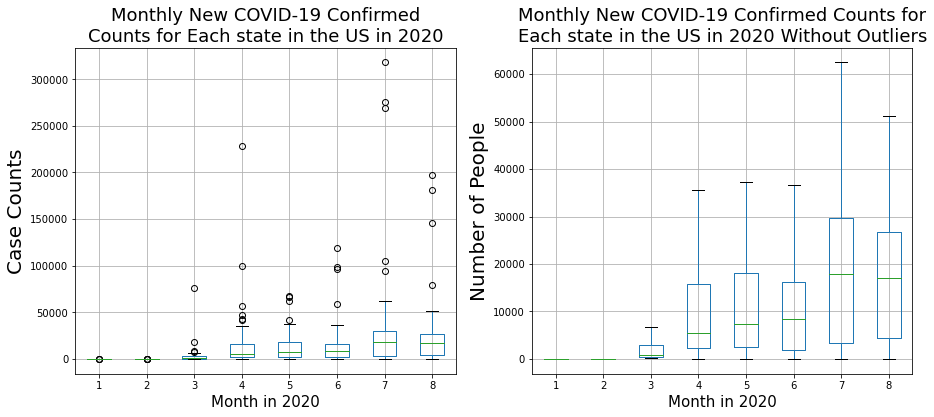

In [31]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6),frameon=True)


state_confirmed_mon_dn.T.boxplot(ax=ax1, meanline=True)
state_confirmed_mon_dn.T.boxplot(ax=ax2, meanline=True, showfliers=False)

ax1.set_title("Monthly New COVID-19 Confirmed\nCounts for Each state in the US in 2020", fontsize = 18)
ax2.set_title("Monthly New COVID-19 Confirmed Counts for\nEach state in the US in 2020 Without Outliers", fontsize = 18)

ax1.set_ylabel("Case Counts", fontsize = 20)
ax2.set_ylabel("Number of People", fontsize = 20)
ax1.set_xlabel("Month in 2020", fontsize = 15)
ax2.set_xlabel("Month in 2020", fontsize = 15)

plt.show()

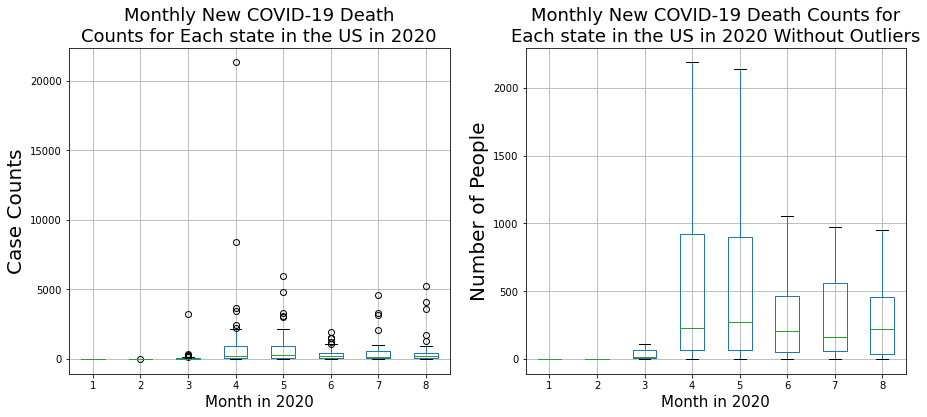

In [32]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6),frameon=True)


state_death_mon_dn.T.boxplot(ax=ax1, meanline=True)
state_death_mon_dn.T.boxplot(ax=ax2, meanline=True, showfliers=False)

ax1.set_title("Monthly New COVID-19 Death\nCounts for Each state in the US in 2020", fontsize = 18)
ax2.set_title("Monthly New COVID-19 Death Counts for\nEach state in the US in 2020 Without Outliers", fontsize = 18)

ax1.set_ylabel("Case Counts", fontsize = 20)
ax2.set_ylabel("Number of People", fontsize = 20)
ax1.set_xlabel("Month in 2020", fontsize = 15)
ax2.set_xlabel("Month in 2020", fontsize = 15)

plt.show()

From the boxplots above, it can be observed that the mean value for monthly increase of confirmed counts are increasing for all the months except July, which is incomplete. Monthly rise in death counts shows a positive trend at first but is decreasing between May and July. The months with larger spread for both confirmed counts and death counts are April, May and June.


<a id='2-3'></a>

### 3. Top 10 US States with the Highest Aggregated Confirmed Counts and Death Counts

Top 10 US states with the highest aggregated confirmed counts and death counts are presented below. Their aggregated case counts are plotted in a time series line graph, both for confirmed cases and death cases.

In [26]:
# Get top 10 states for each count based on aggregate sum thus far
state_confirmed_npl=state_confirmed.drop('Population',1)
top10_state_confirmed = pd.DataFrame(state_confirmed_npl.sort_values(by = state_confirmed_npl.columns.values[-1], ascending=False)).head(10)

state_death_npl=state_death.drop('Population',1)
top10_state_death = pd.DataFrame(state_death_npl.sort_values(by = state_death_npl.columns.values[-1], ascending=False)).head(10)

top10_data = {'Top 10 States with Confirmed Cases in the US': top10_state_confirmed.index, 'Top 10 States with Death Counts in the US': top10_state_death.index}
pd.DataFrame(data=top10_data, index=range(1,11))

,Top 10 States with Confirmed Cases in the US,Top 10 States with Death Counts in the US
1,California,New York
2,Texas,New Jersey
3,Florida,California
4,New York,Texas
5,Georgia,Florida
6,Illinois,Massachusetts
7,Arizona,Illinois
8,New Jersey,Pennsylvania
9,North Carolina,Michigan
10,Tennessee,Georgia


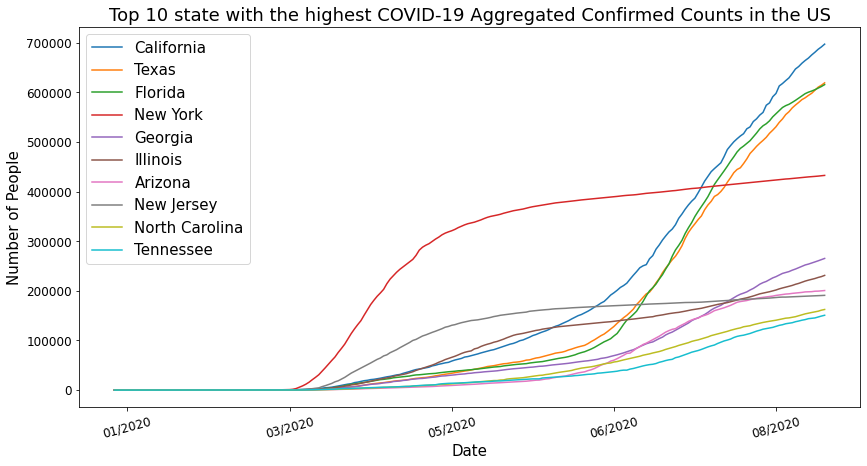

In [27]:
# set the figure dimensions
figure = plt.figure(figsize = (14, 7)) 
axes = figure.add_subplot(1, 1, 1) 
axes.xaxis.set_major_formatter(formatter) 

# Set the tick and label fontsize
plt.setp(axes.get_xticklabels(), rotation = 15) 
plt.tick_params(labelsize = 12)

for state in top10_state_confirmed.index:
    axes.plot(m_y, state_confirmed_npl.T[state],label=state) 

# Set the title and axis labels
plt.title("Top 10 state with the highest COVID-19 Aggregated Confirmed Counts in the US", fontsize = 18)
plt.ylabel("Number of People", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.legend(loc=2, prop={'size': 15})
plt.show() 

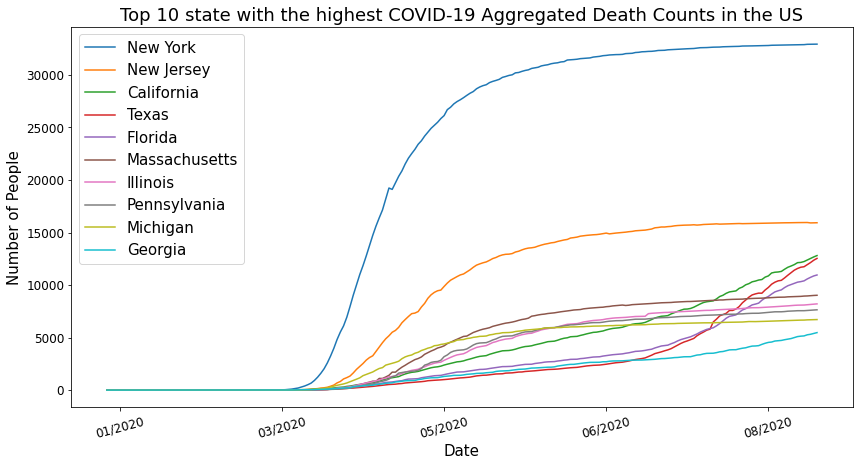

In [28]:
# set the figure dimensions
figure = plt.figure(figsize = (14, 7)) 
axes = figure.add_subplot(1, 1, 1) 
axes.xaxis.set_major_formatter(formatter) 

# Set the tick and label fontsize
plt.setp(axes.get_xticklabels(), rotation = 15) 
plt.tick_params(labelsize = 12)

for state in top10_state_death.index:
    axes.plot(m_y, state_death_npl.T[state],label=state) 

# Set the title and axis labels
plt.title("Top 10 state with the highest COVID-19 Aggregated Death Counts in the US", fontsize = 18)
plt.ylabel("Number of People", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.legend(loc=2, prop={'size': 15})
plt.show() 

New York was the state with the most confirmed case counts before July. The top three states with the highest confirmed case counts are California, Texas, and Florida, which has surpassed New York in July. The death case counts for New York are much higher than any other states, with New Jersey, running second, but only having less than half of New York's aggregated death counts. California, Texas and Florida, being the top 3 states with most confirmed cases, rank 4th to 6th in death case counts.

Outliers that was observed from the previous boxplots are confirmed with the above two line plots. With the top 3 confirmed states having case counts of from 600,000 to 700,000, the top 5th to 10th states have less than 300,000 of confirmed case counts. Similarly with the death case counts, New York has about 35,000 death case counts, while other states do not report more than 15,000 death cases. It can be shown that the COVID-19 cases are heavily concentrated in specific states, namely New York, California, Texas, Florida, and New Jersey.

Exploratory Data Analysis (EDA) offers better understanding of the past COVID-19 data, which would facilate the next stage of predicting future case counts.